# Project TMDb movie Analysis
#### By Ahad Alotaibi


## Table of content 

 <li><a href='#intro'>Introducation </a></li>
 <li><a href='#wrangling'>Date Wrangling</a></li>
 <li><a href='#eda'>Exploratory Data Analysis </a></li>
 <li><a href='#conclusions'>conclusions </a></li> </ul>



#Introducation



In this project we will be analysing data assocaiated with the TMDb movie data (cleaned from original data on Kaggle) This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.In particular, we will be intrested in finding:
- The original title for the movie have the highest runtime in 1990.
- Which genre (romance / horror) has the highest popularity (with the release bettwen years (1960 - 1990))
-Is there a relationship between budget and revenue
-Number of movie releases per year 

In [1]:
# Import Python necessary  package essential for our analysis 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display

# Date Wrangling 
### General properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('tmdb-movies.csv')
df.head(100000)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [3]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [ ]:
# Shape of our dataset.
df.shape

(10866, 21)

In [ ]:
# describe the dataset 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# to defind how much null value in each culome 
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

We know the culome 
(popularity ,budget ,revenue ,original_title ,runtime,release_date,revenue,vote_count ,vote_average ,release_year,budget_adj,revenue_adj ) not have null value.

In [6]:
# Check for duplicated rows:
df.duplicated().sum()

1

In [7]:
#drop these duplicated rows 
df.drop_duplicates(inplace=True)
# To confirme is drop Duplicate
df.duplicated().sum()

0

In [8]:
# Drop the coulme we will not used in data anlaysis 
df.drop(
    ['homepage','tagline','production_companies','keywords','overview'
     ,'cast','director','release_date','vote_count','vote_average'], inplace = True, axis = 1)

# Exploratory Data Analysis

Research Question 1 ( The original title for the 
movie have the highest runtime in 1990 ? )

In [9]:
#Step 1
#show all row when release_year = 1990
#df.query('release_year == 1990')
#get runtime 
release_copy=df.query('release_year == 1990').get(["original_title","runtime"])
#release_copy=df.query('release_year == 1990')
release_copy.head(10866)
#get the original title for the movie have the highest runtime in 1990 
print(release_copy['runtime'].max())
print("Movie have highest runtime in 1990")
print(release_copy.query('runtime==192').get(["original_title"]))

192
Movie have highest runtime in 1990
         original_title
9995  Stephen King's It


**Observations** : The original_title of Movie have highest runtime in 1990 is Stephen King's It


 Research Question 2 (Which genre (romance / horror) has the highest popularity (with the release bettwen years (1960 - 1990)

In [10]:
# Step 1
from pandas.core.window.expanding import Axis
from os import access
# to split the genres 
genres = df.genres.str.get_dummies()
# concat the dummies with the data set  
genres1=pd.concat([df,genres],axis=1)
# To make sure of the merge print the name of columns 
genres1.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'runtime', 'genres', 'release_year', 'budget_adj', 'revenue_adj',
       'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
       'Western'],
      dtype='object')

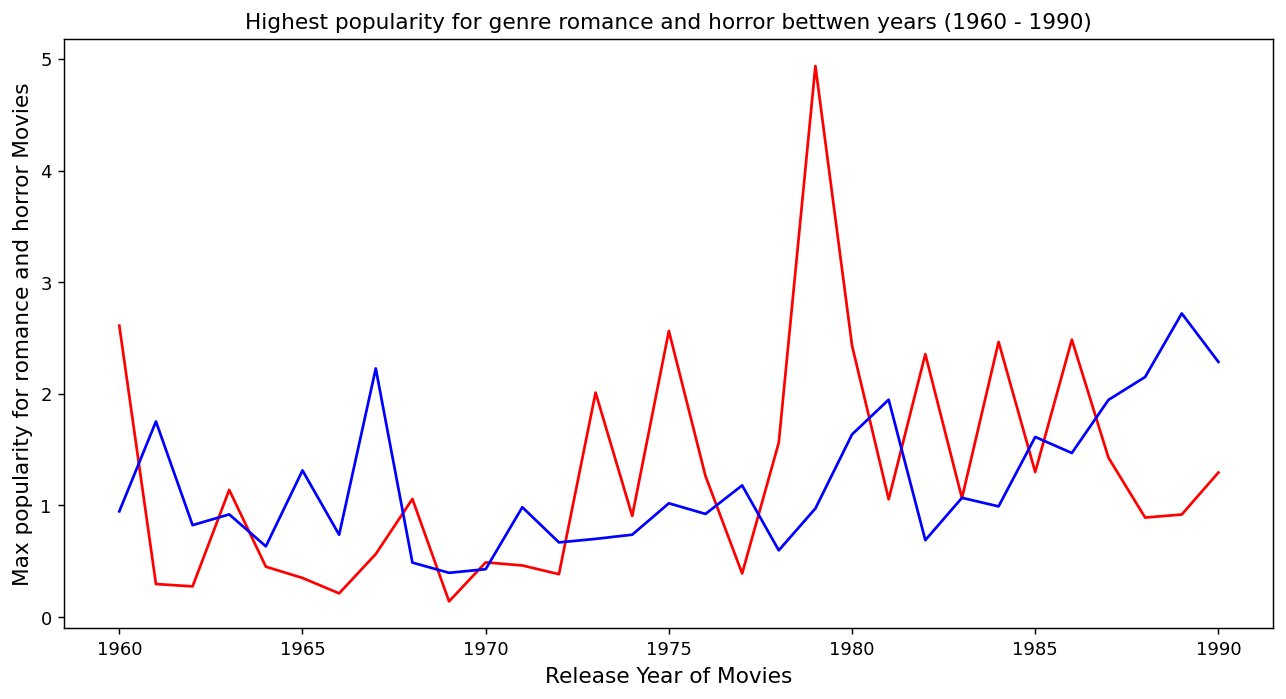

In [11]:
from matplotlib import colors
from numpy.lib.shape_base import tile
#step 2 
# query about release_year with the release bettwen years (1960 - 1990) have 1 in Romance or Horror
Quetion2=genres1.query('release_year >= 1960 & release_year <= 1990').get(["release_year","popularity","Romance","Horror"])

# find the MAX popularity in Romance 
romance=Quetion2.query('Romance == 1').get(["release_year","popularity"]).groupby('release_year')[['popularity']].max()

# find the MAX popularity in Horror 
Horror=Quetion2.query('Horror == 1').get(["release_year","popularity"]).groupby('release_year')[['popularity']].max()

#Step 3 
#and storing all this in variable
Horror_polt= Horror.groupby('release_year')[['popularity']].sum()
romance_polt=romance.groupby('release_year')[['popularity']].sum()
#giving the figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)
#labeling x-axis
plt.xlabel('Release Year of Movies', fontsize = 12)
#labeling y-axis
plt.ylabel('Max popularity for romance and horror Movies', fontsize = 12)
#title of a the plot
plt.title('Highest popularity for genre romance and horror bettwen years (1960 - 1990)')
#plotting what needs to be plotted
plt.plot(Horror_polt, color='red')
plt.plot(romance_polt, color= 'blue')
#showing the plot
plt.show()


**Observations**:
The popularity of Romance Movies began from 1982 to 1990 and achieved the highest prevalence in 1990, while horror Movies began to decline in popularity after 1986, and the highest value of spread was in 1979.

Research Question 3 (Is there a relationship between budget and revenue?)

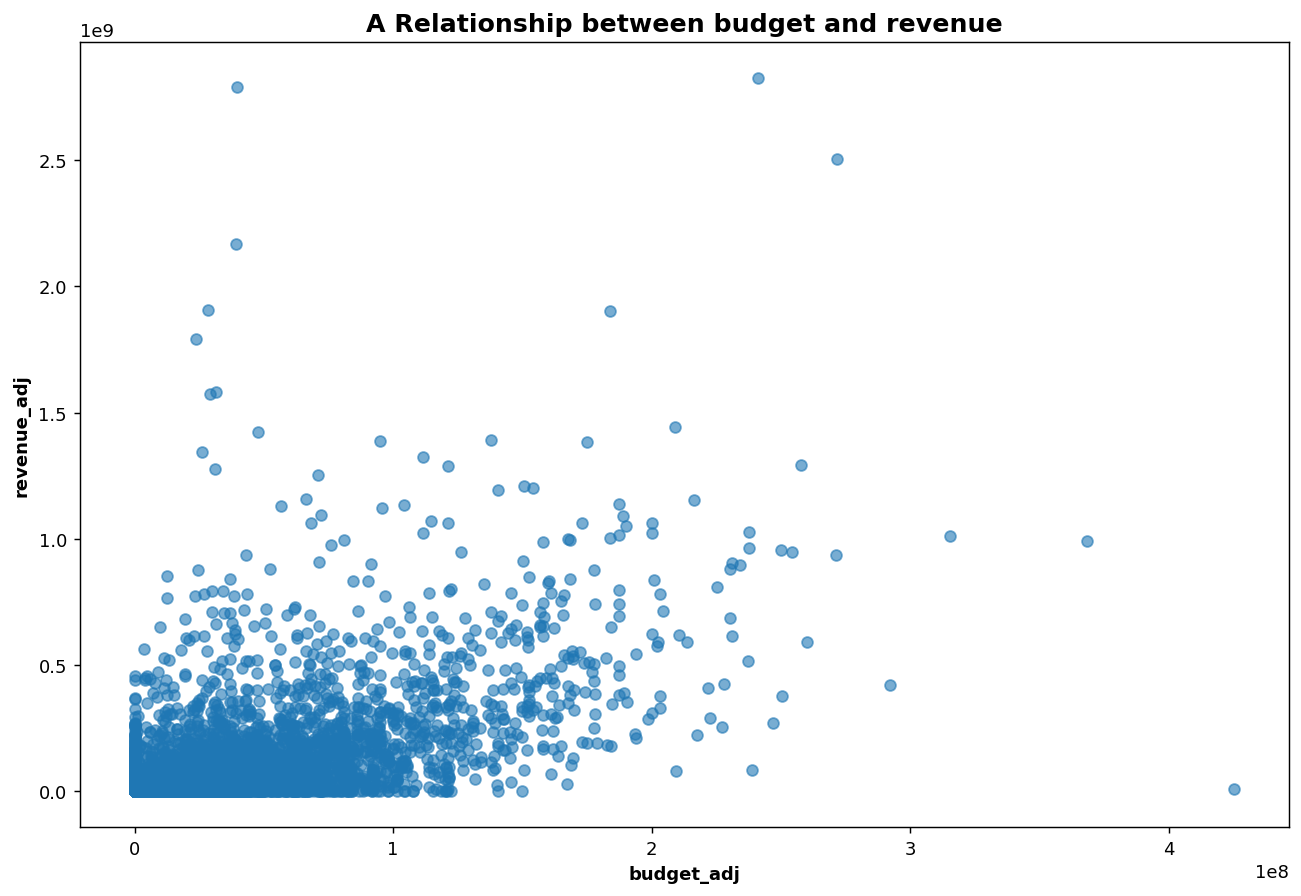

In [12]:
from matplotlib import colors
from numpy.lib.shape_base import tile
#Research Question 2 (Is there a relationship between budget and revenue?)
#Step 1
#giving the figure size(width, height)
plt.figure(figsize=(12,8), dpi = 130)
# Plotting the relation between revenue & vote counts
Quetion3= plt.scatter(df['budget_adj'],
            df['revenue_adj'], 
            alpha = 0.6) #transparency level of points on the plot. Used to avoid overplotting
# add and format additional elements, such as titles and axis labels
#title of a the plot
plt.title('A Relationship between budget and revenue',fontsize = 14, 
          weight = "bold")
#labeling x-axis
plt.xlabel("budget_adj", weight = "bold")
#labeling y-axis
plt.ylabel("revenue_adj", weight = "bold")
#showing the plot
plt.show()

**Observations**:


1.   The graph shows that the most Movies that had a budget between 0 to 1 million dollars (in dollar value in 2010) got a Revenue equal to the budget  or less than 0.5 of the budget .
2.   The highest Revenue value was 2.9 million dollars(in dollar value in 2010) for a movie with a budget of 2.4
3.   The value of the budget spent on the movies is not the main factor in increasing the Revenue




Research Question 4 (Number of movie releases per year ?)


Text(0.5, 1.0, 'Number of movie releases per year')

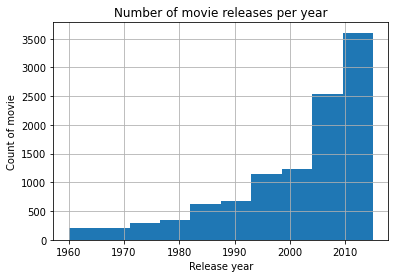

In [52]:
#Research Question 4 (Number of movie releases per year ?)
Release_Movie=df.query('release_year >=1960').get(["release_year"])
Release_Movie.release_year.hist()
# title and labels
plt.xlabel('Release year')
plt.ylabel('Count of movie')
plt.title('Number of movie releases per year')

**Observations**:

1.   From 1960 to 1984, the number of Movies produced each year did not exceed 100 Movies.
2.   The graph shows The Movie production sector began to grow in 1979's.
3.   700 Movie were produced in 2015, which is the highest value so far.

#Conclusions


####Data Limitations:

Although our dataset contains more than 10,000 rows it's pretty insufficient to draw precise conclusions :

1. Most of the data columns are irrelevant for the analysis

2. many NAN values are missing from our dataset for an uncertain reason (We should try a better web scrapping for a better data quality or prepare data from a different source).

3. The formula for writing budget, Revenue, etc. is inaccurate

####Conclusions :


*   The original_title of Movie 
have highest runtime in 1990 is Stephen King's It
*   The popularity of Romance Movies began from 1982 to 1990 and achieved the highest prevalence in 1990, while horror Movies began to decline in popularity after 1986, and the highest value of spread was in 1979.   
*   The graph shows that the most Movies that had a budget between 0 to 1 million dollars (in dollar value in 2010) got a Revenue equal to the budget  or less than 0.5 of the budget .
*   The highest Revenue value was 2.9 million dollars(in dollar value in 2010) for a movie with a budget of 2.4
*   The value of the budget spent on the movies is not the main factor in increasing the Revenue .
*   From 1960 to 1984, the number of Movies produced each year did not exceed 100 Movies.
*   The graph shows The Movie production sector began to grow in 1979's.
*   700 Movie were produced in 2015, which is the highest value so far.